<a href="https://colab.research.google.com/github/gbaghdadi/NeuromatchDeepLearningProject/blob/main/projects/neurons/load_stringer_spontaneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Stringer spontaneous data

includes some visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# @title Figure settings
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
# @title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [4]:
# @title Data loading

dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])



dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (11983 by 7018). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain.
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details.
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other.
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

In [19]:
# @title Shape of each data

print('neuralActivity dimension:   ', dat['sresp'].shape)
print('stat dimension:  ', dat['stat'].shape)
print('running speed dimension:  ', dat['run'].shape)
print('pupil area dimension:  ', dat['pupilArea'].shape)
print('pupil xy position dimension:  ', dat['pupilCOM'].shape)
print('faceSVD dimension:   ',dat['beh_svd_time'].shape)

neuralActivity dimension:    (11983, 7018)
stat dimension:   (11983, 1)
running speed dimension:   (7018, 1)
pupil area dimension:   (7018, 1)
pupil xy position dimension:   (7018, 2)
faceSVD dimension:    (7018, 1000)


[Text(0.5, 0, 'time bins'), Text(0, 0.5, 'face SVD #5')]

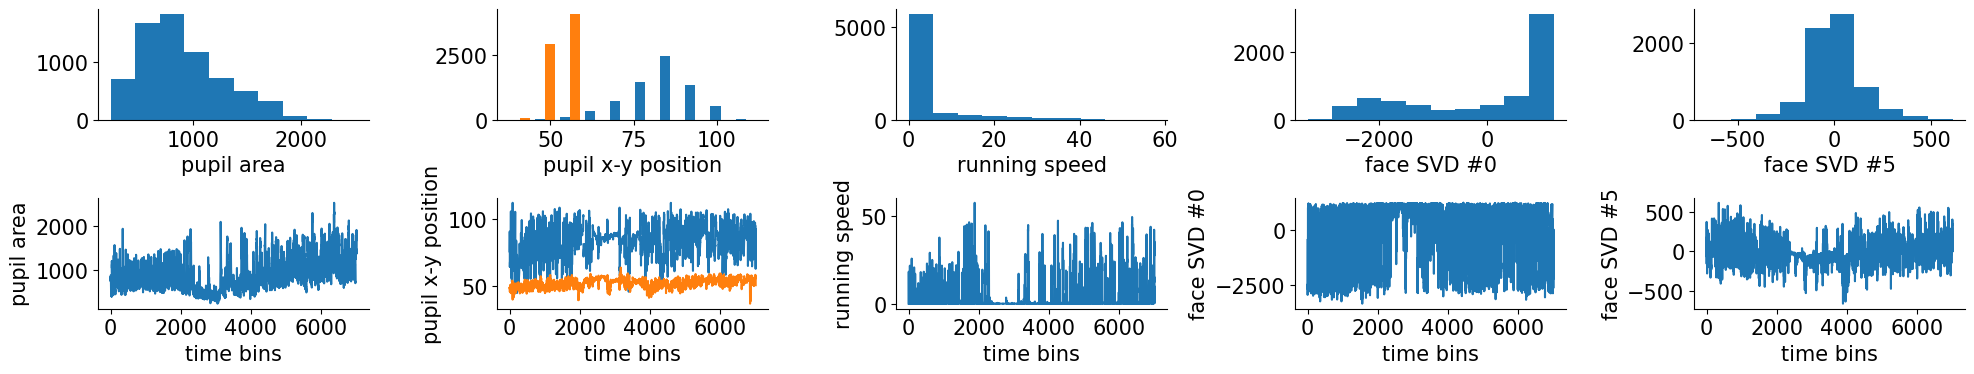

In [20]:
# @title Data visualizaion

ax = plt.subplot(2,5,1)
plt.hist(dat['pupilArea'])
ax.set(xlabel='pupil area')

ax = plt.subplot(2,5,6)
plt.plot(dat['pupilArea'])
ax.set(xlabel='time bins', ylabel = 'pupil area')
#--------------------------------------------------------------
ax = plt.subplot(2,5,2)
plt.hist(dat['pupilCOM'])
ax.set(xlabel='pupil x-y position')

ax = plt.subplot(2,5,7)
plt.plot(dat['pupilCOM'])
ax.set(xlabel='time bins', ylabel = 'pupil x-y position')
#--------------------------------------------------------------
ax = plt.subplot(2,5,3)
plt.hist(dat['run'])
ax.set(xlabel='running speed')

ax = plt.subplot(2,5,8)
plt.plot(dat['run'])
ax.set(xlabel='time bins', ylabel = 'running speed')
#--------------------------------------------------------------
ax = plt.subplot(2,5,4)
plt.hist(dat['beh_svd_time'][:,0])
ax.set(xlabel='face SVD #0')

ax = plt.subplot(2,5,9)
plt.plot(dat['beh_svd_time'][:,0])
ax.set(xlabel='time bins', ylabel = 'face SVD #0')
#--------------------------------------------------------------
ax = plt.subplot(2,5,5)
plt.hist(dat['beh_svd_time'][:,5])
ax.set(xlabel='face SVD #5')

ax = plt.subplot(2,5,10)
plt.plot(dat['beh_svd_time'][:,5])
ax.set(xlabel='time bins', ylabel = 'face SVD #5')

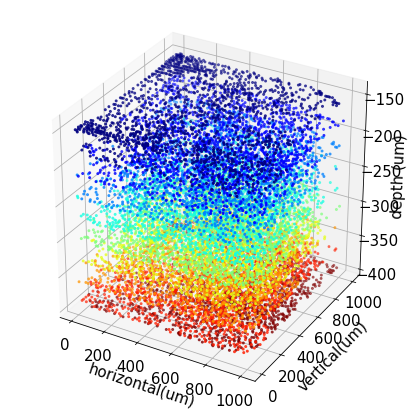

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()